# 이미지 컨투어

컨투어(contour)란 동일한 색 또는 동일한 픽셀값(강도,intensity)을 가지고 있는 영역의 경계선 정보다. 물체의 윤곽선, 외형을 파악하는데 사용된다. 

OpenCV의 `findContours` 함수로 이미지의 컨투어 정보, 컨투어의 상하구조(hierachy) 정보를 출력한다. 흑백이미지 또는 이진화된 이미지만 적용할 수 있다.

`images, contours, hierachy  = cv2.findContours(image, mode, method)`

* `image`: 흑백이미지 또는 이진화된 이미지
* `mode` : 컨투어를 찾는 방법
  * `cv2.RETR_EXTERNAL`: 컨투어 라인 중 가장 바깥쪽의 라인만 찾음
  * `cv2.RETR_LIST`: 모든 컨투어 라인을 찾지만, 상하구조(hierachy)관계를 구성하지 않음
  * `cv2.RETR_CCOMP`: 모든 컨투어 라인을 찾고, 상하구조는 2 단계로 구성함
  * `cv2.RETR_TREE`: 모든 컨투어 라인을 찾고, 모든 상하구조를 구성함
* `method` : 컨투어를 찾을 때 사용하는 근사화 방법
  * `cv2.CHAIN_APPROX_NONE`: 모든 컨투어 포인트를 반환
  * `cv2.CHAIN_APPROX_SIMPLE`: 컨투어 라인을 그릴 수 있는 포인트만 반환
  * `cv2.CHAIN_APPROX_TC89_L1`: Teh_Chin 연결 근사 알고리즘 L1 버전을 적용하여 컨투어 포인트를 줄임
  * `cv2.CHAIN_APPROX_TC89_KCOS`: Teh_Chin 연결 근사 알고리즘 KCOS 버전을 적용하여 컨투어 포인트를 줄임

In [1]:
import cv2
from skimage.data import horse

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

images, contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

컨투어 정보는 컨투어를 구성하는 점들로 이루어진 배열의 리스트다. 리스트의 원소의 갯수는 컨투어의 갯수와 같다. 

In [2]:
len(contours)

2

In [3]:
contours[0].shape

(312, 1, 2)

In [4]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

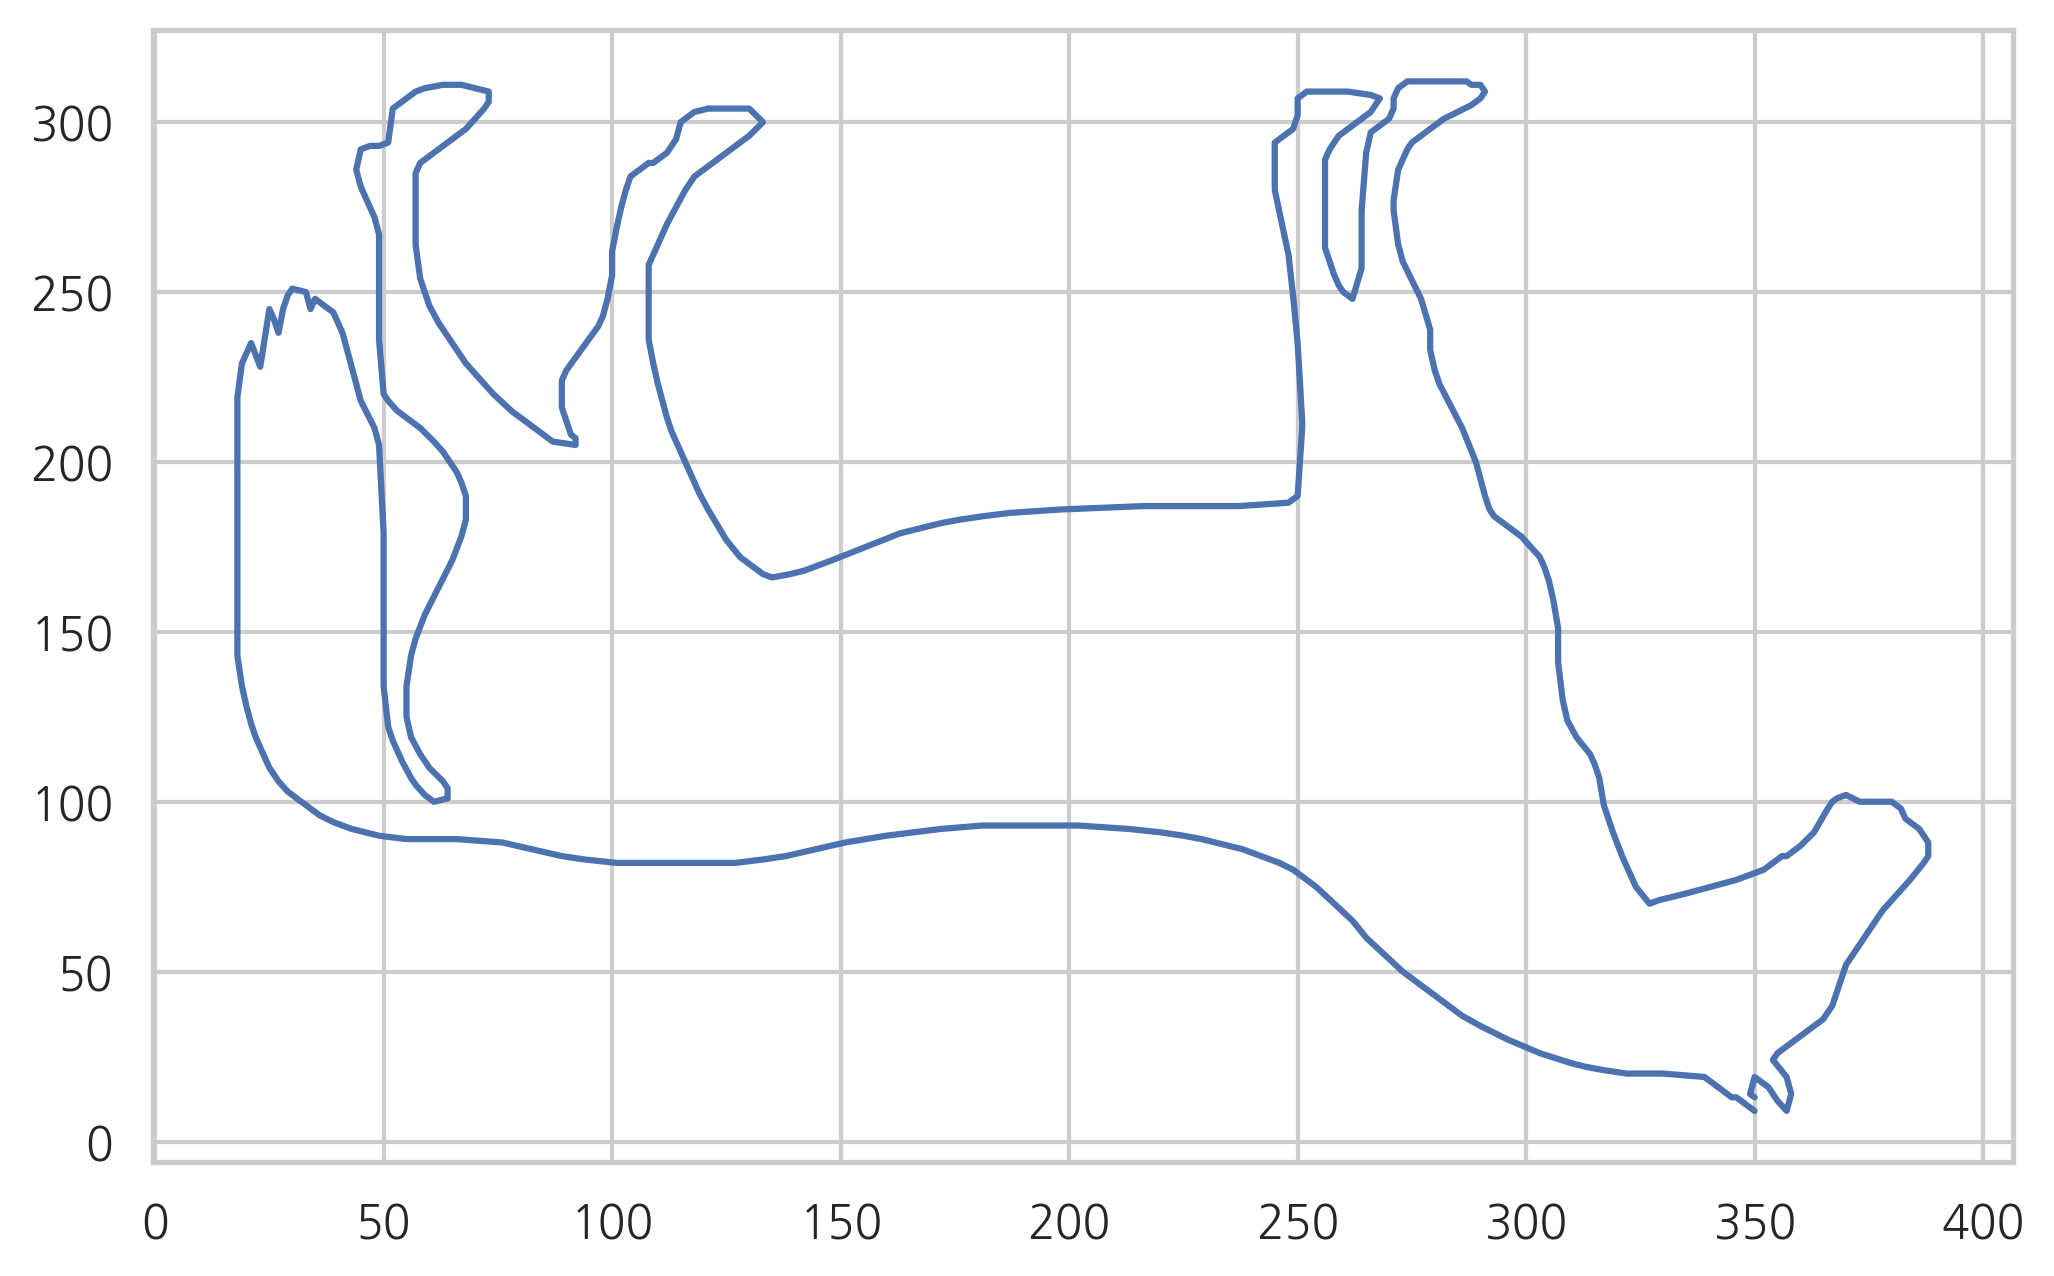

In [5]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="b")
plt.show()

상하구조(hierarchy)는 1, 0, -1 값으로 이루어진 (컨투어 수 x 4) 크기의 행렬이다.  

* 1번 원소: 같은 수준의 다음 컨투어의 인덱스. 같은 수준의 다음 컨투어가 없으면 -1
* 2번 원소: 같은 수준의 이전 컨투어의 인덱스. 같은 수준의 이전 컨투어가 없으면 -1
* 3번 원소: 하위 자식 컨투어의 인덱스. 가장 하위의 컨투어면 -1
* 4번 원소: 부모 컨투어의 인덱스. 가장 상위의 컨투어면 -1

다음 값에서 첫번째 컨투어라인이 가장 상위 컨투어라는 것을 알 수 있다.

In [6]:
hierachy

array([[[-1, -1,  1, -1],
        [-1, -1, -1,  0]]], dtype=int32)

`drawContours` 함수를 사용하면 컨투어 정보에서 비트맵 이미지를 만들 수 있다.

`drawContours(image, contours, contourIdx, color)`

* `image`: 원본 이미지
* `contours`: 컨투어 라인 정보
* `contourIdx`: 컨투어 라인 번호
* `color`: 색상


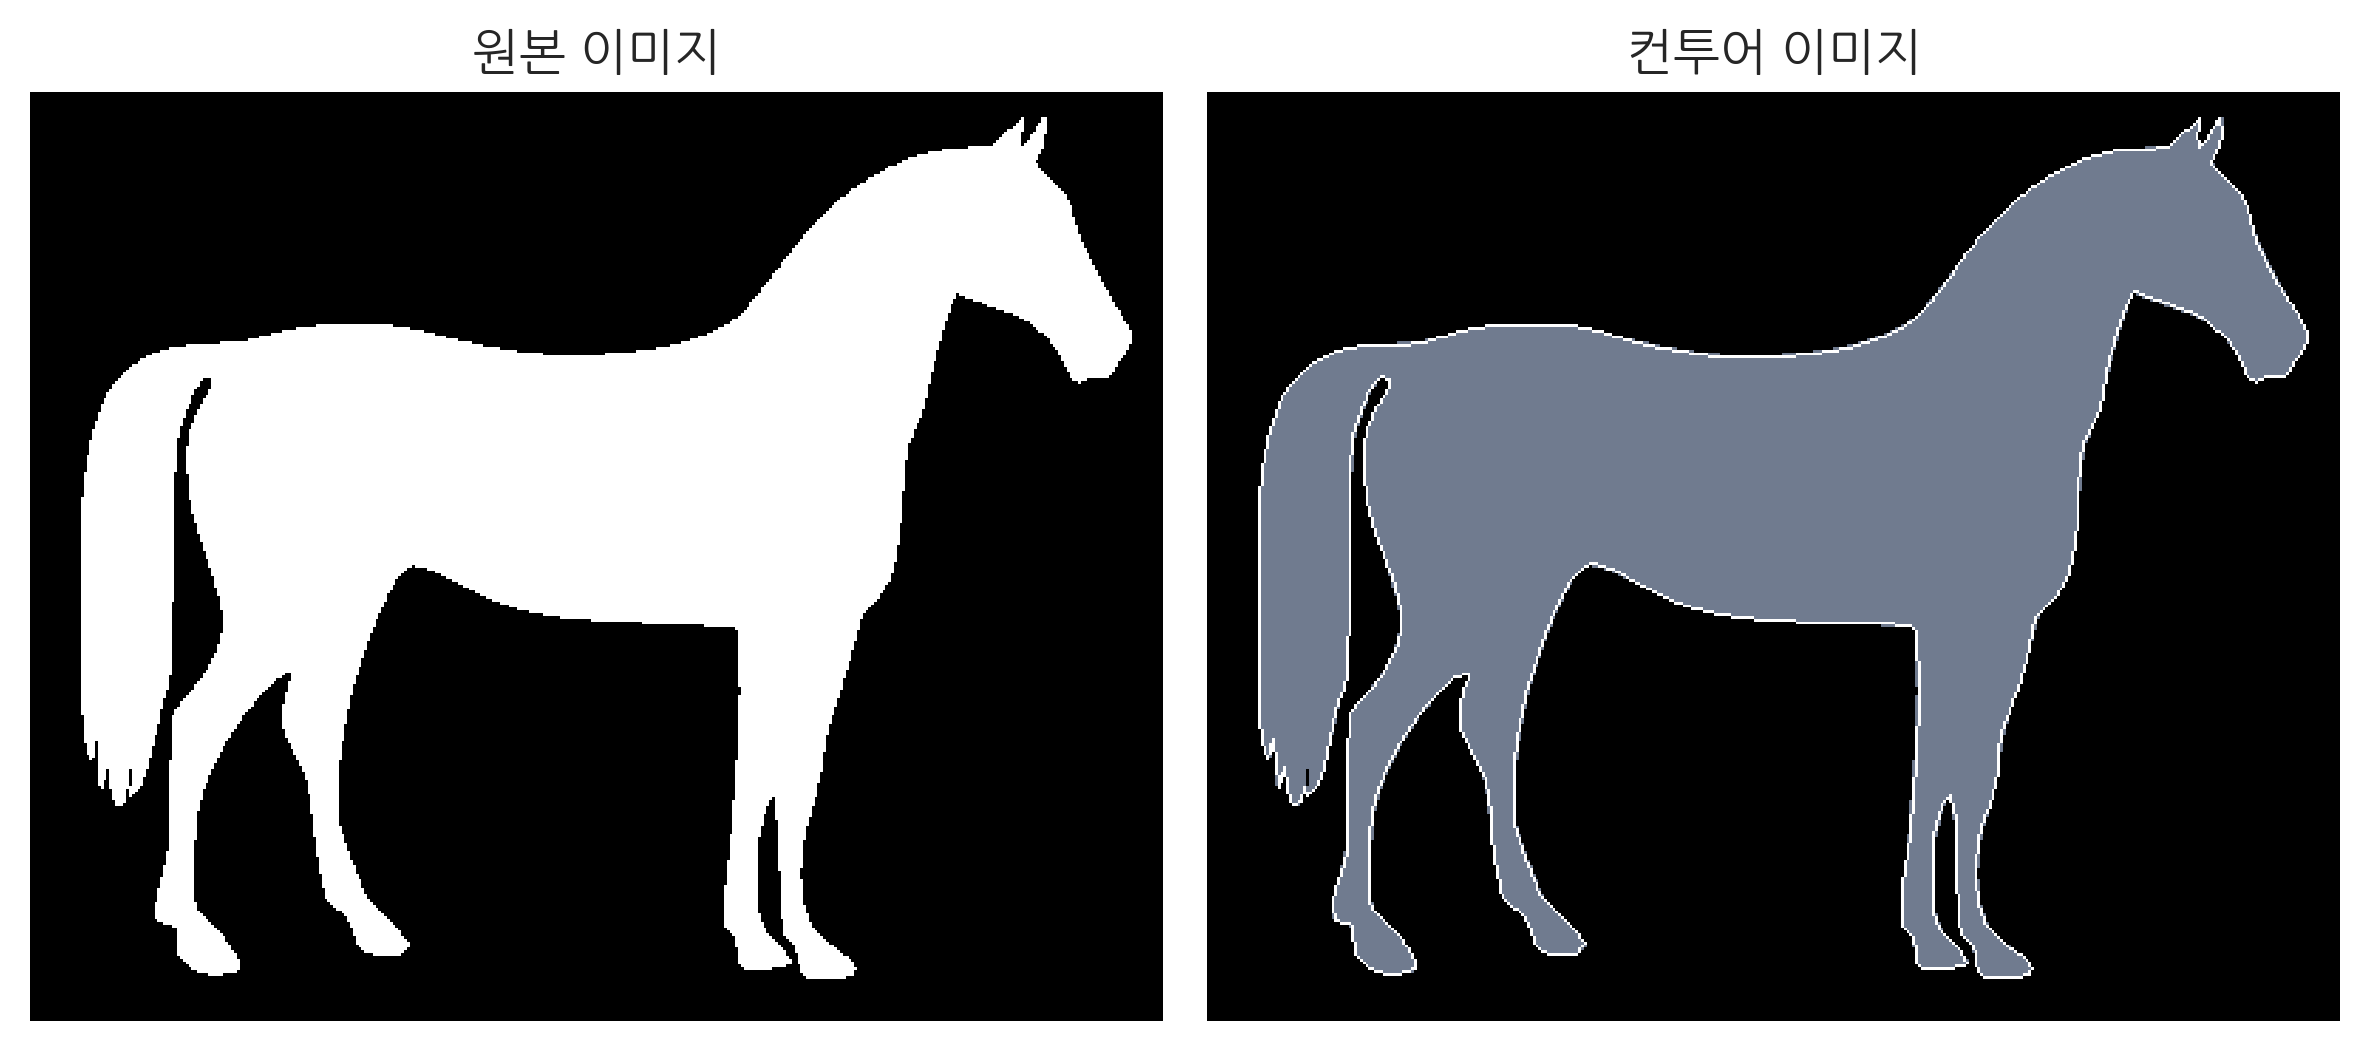

In [7]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("컨투어 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

## 컨투어 특징

### 이미지 모멘트

이미지 모멘트는 컨투어에 관한 특징값을 뜻한다. OpenCV에서는 `moments` 함수로 이미지 모멘트를 구한다. 컨투어 포인트 배열을 입력하면 해당 컨투어의 모멘트를 딕셔너리 타입으로 반환한다. 반환하는 모멘트는 총 24개로 10개의 위치 모멘트, 7개의 중심 모멘트, 7개의 정규화된 중심 모멘트로 이루어져 있다.

- Spatial Moments : M00, M01, M02, M03, M10, M11, M12, M20, M21, M30
- Central Moments : Mu02, Mu03, Mu11, Mu12, Mu20, Mu21, Mu30
- Central Normalized Moments : Nu02, Nu03, Nu11, Nu12, Nu20, Nu21, Nu30

In [8]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

컨투어의 면적은 모멘트의 `m00` 값이고, `cv2.contourArea()` 함수로도 구할 수 있다.

In [9]:
cv2.contourArea(c0)

42355.0

컨투어의 둘레는 `arcLength` 함수로 구할 수 있다. 두번째 파라미터인 closed의 의미는 폐곡선의 여부로, 설정한 값이 True 일 때는 컨투어의 시작점과 끝점을 이어 도형을 구성하고 그 둘레 값을 계산한다. False인 경우 시작점과 끝점을 잇지 않고 둘레를 계산한다.

In [10]:
cv2.arcLength(c0, closed=True), cv2.arcLength(c0, closed=False)

(2203.678272008896, 2199.678272008896)

컨투어를 둘러싸는 박스는 `boundingRect` 함수로 구한다.

In [11]:
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h

(18, 9, 371, 304)

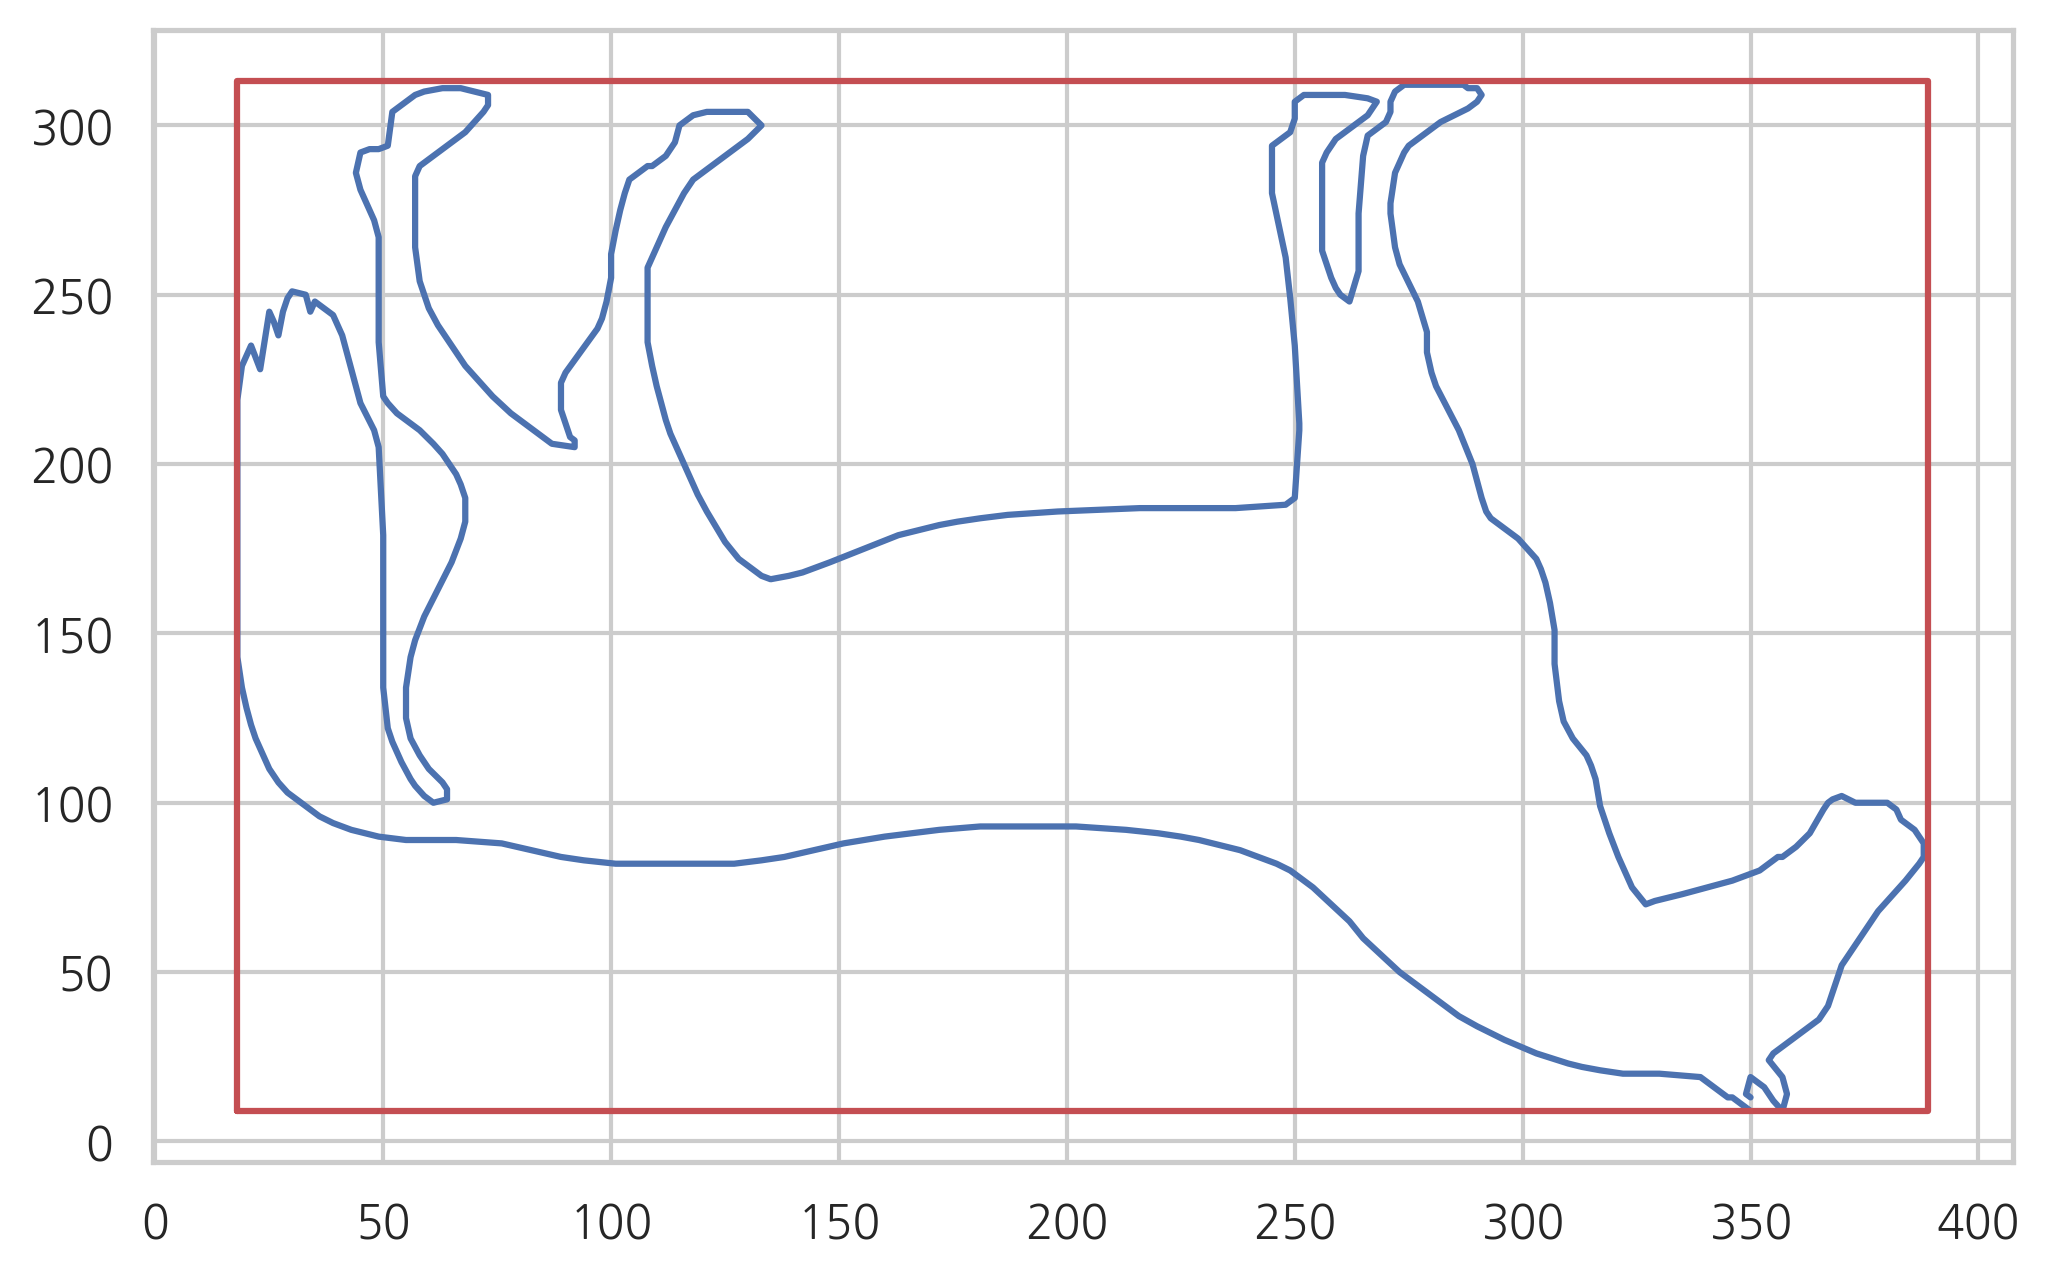

In [12]:
plt.plot(x0, y0, c="b")
plt.plot(
    [x, x + w, x + w, x, x], 
    [y, y, y + h, y + h, y],
    c="r"
)
plt.show()

가로 세로 비율은 바운딩 박스에서 구할 수 있다.

In [13]:
aspect_ratio = float(w) / h
aspect_ratio

1.2203947368421053

컨투어 라인의 중심점과 좌우상하의 끝점은 다음처럼 구한다.

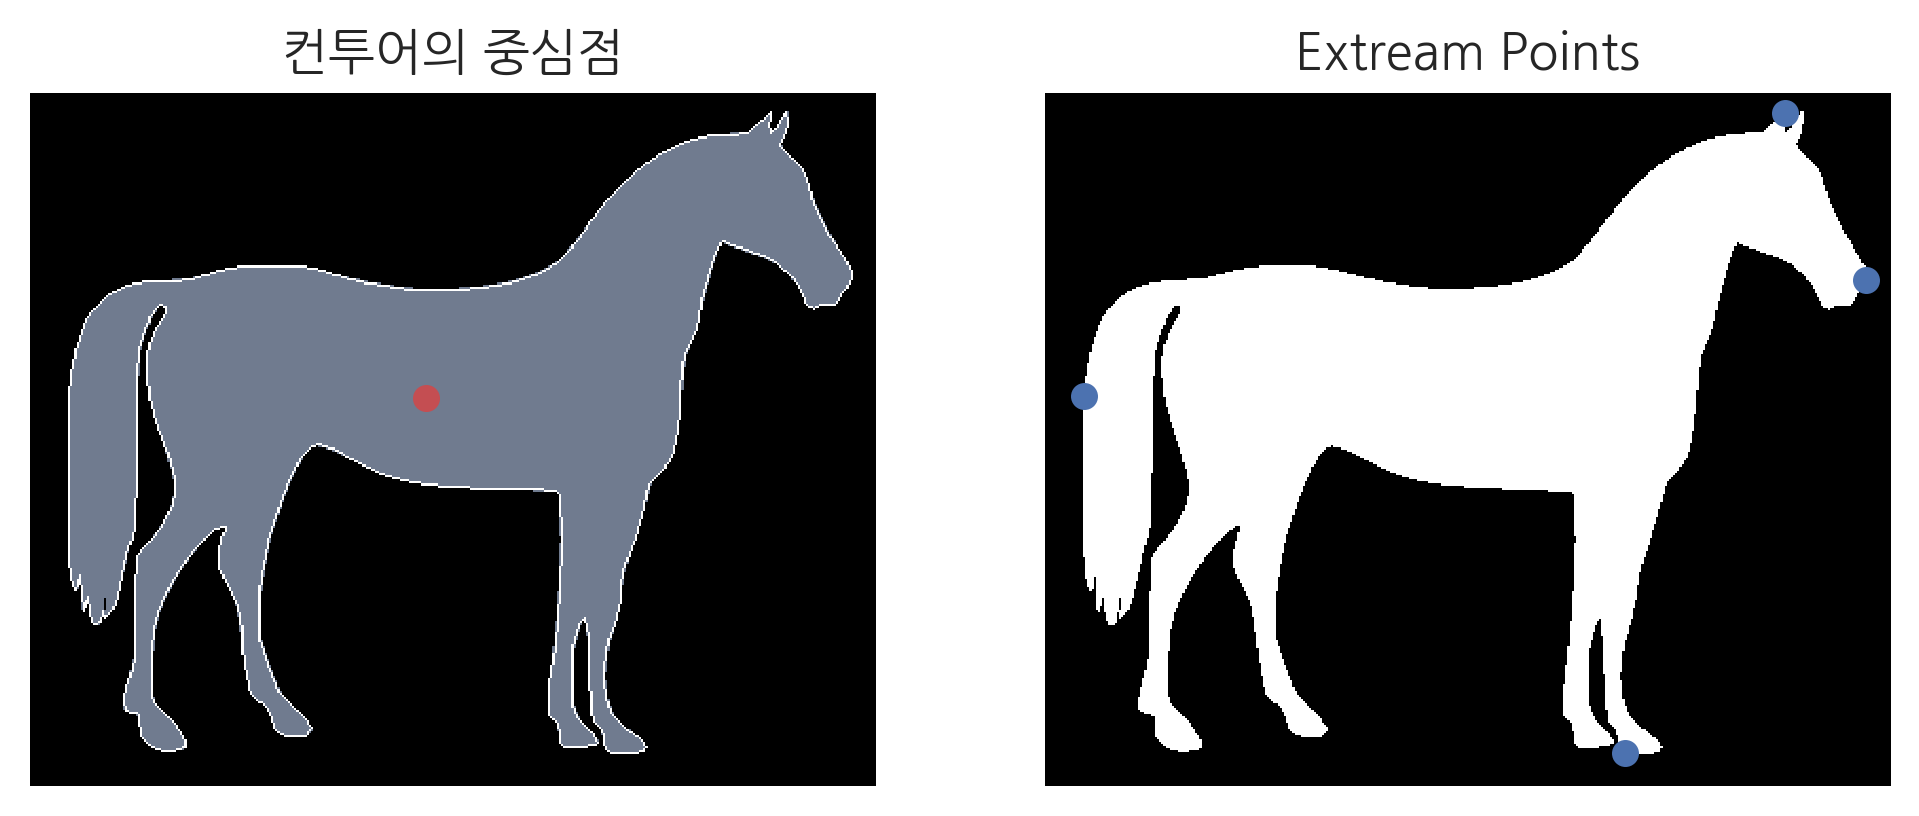

In [14]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.subplot(1,2,1)
plt.imshow(image, cmap='bone')
plt.title("컨투어의 중심점")
plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)

plt.subplot(1,2,2)
plt.imshow(img_raw, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="b", s=30)
plt.title("Extream Points")

plt.show()

#### 연습 문제 1

다음 왼쪽 이미지를 컨투어 처리하여 오른쪽 이미지와 같이 꼭지점을 계산하라. 이미지는 다음 명령으로 내려받는다.

```
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png
```

<img src="https://datascienceschool.net/upfiles/abceb96aca9d4084bbb6f570372497ea.png">

## 컨투어 추정 

컨투어 추정은 [Douglas-Peucker 알고리즘](https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm)을 이용해 컨투어 포인트의 수를 줄여 실제 컨투어 라인과 근사한 라인을 그릴 때 사용된다. 

OpenCV에서는 `approxPolyDP` 라는 함수로 구현되어 있다. 입력값으로는 컨투어 포인트 배열, 실제 컨투어 라인과 근사치의 최대거리, 폐곡선 여부가 있다. 다음 코드는 실제 컨투어 라인과 근사치의 최대거리를 0.01, 0.05 로 설정하여 실제 컨투어 라인과 비교 한다. 

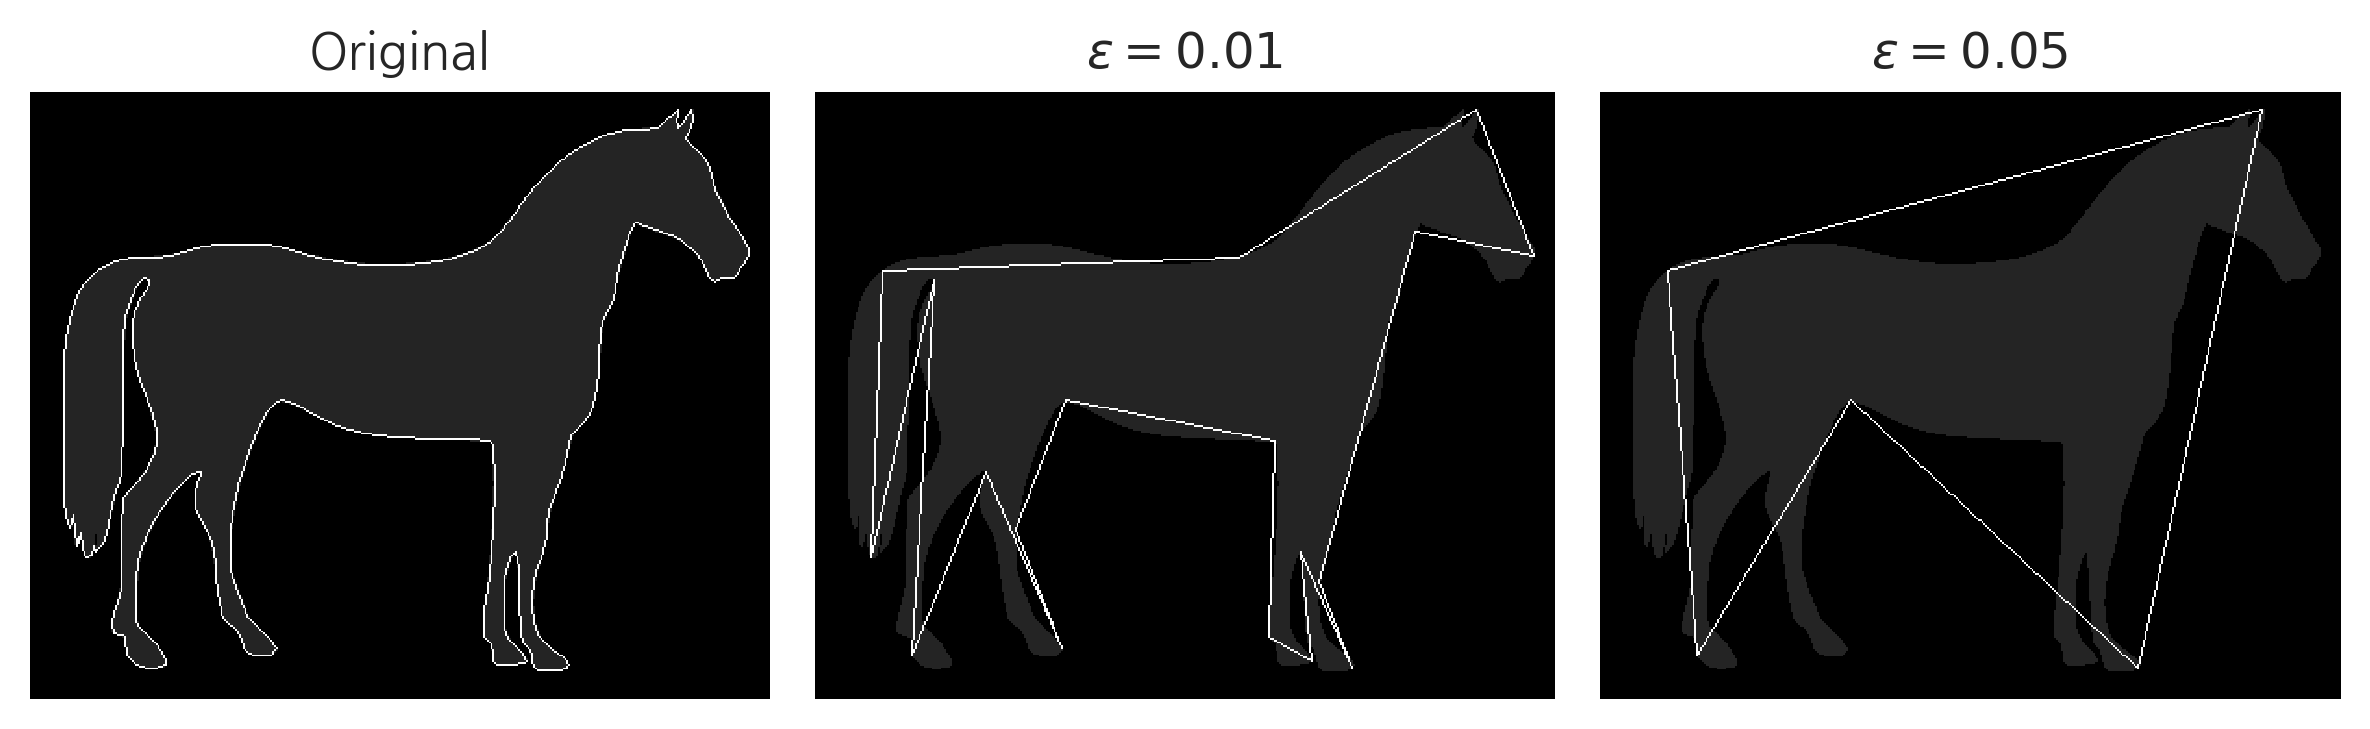

In [15]:
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')
img3 = img_raw.copy().astype('uint8')

c0 = contours[0]

epsilon1 = 0.01*cv2.arcLength(c0, True)
epsilon2 = 0.05*cv2.arcLength(c0, True)

approx1 = cv2.approxPolyDP(c0, epsilon1, True)
approx2 = cv2.approxPolyDP(c0, epsilon2, True)

image1 = cv2.drawContours(img1, [c0], -1, 7)  #
image2 = cv2.drawContours(img2, [approx1], -1, 7)
image3 = cv2.drawContours(img3, [approx2], -1, 7)

titles = ['Original', '$\epsilon=0.01$', '$\epsilon=0.05$']
images = [image1, image2, image3]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Convex Hull 

Convex Hull이란 컨투어 포인트를 모두 포함하는 볼록한 외곽선을 의미한다. 결과는 컨투어 추정과 비슷하지만 방법이 다르다. 먼저, `cv2.isContourConvex()` 함수를 사용해 이미지의 컨투어가 볼록(convex)한지 확인 할 수 있다. 입력한 컨투어 배열이 볼록(convex)하다면 True, 아니라면 False 값을 반환한다. 이때 볼록하다는 것은 컨투어 라인이 볼록하거나 평평한 선이라는 의미이다. 이전에 확인 했듯이 말 이미지의 컨투어 라인은 볼록한 선으로만 이루어져있지 않다. 따라서 다음 코드의 결과는 False를 반환한다. 

In [16]:
cv2.isContourConvex(c0)

False

컨투어 라인이 볼록하지 않다면, `cv2.convexHull()` 함수를 사용해 컨투어라인을 볼록하게 만들 수 있다.

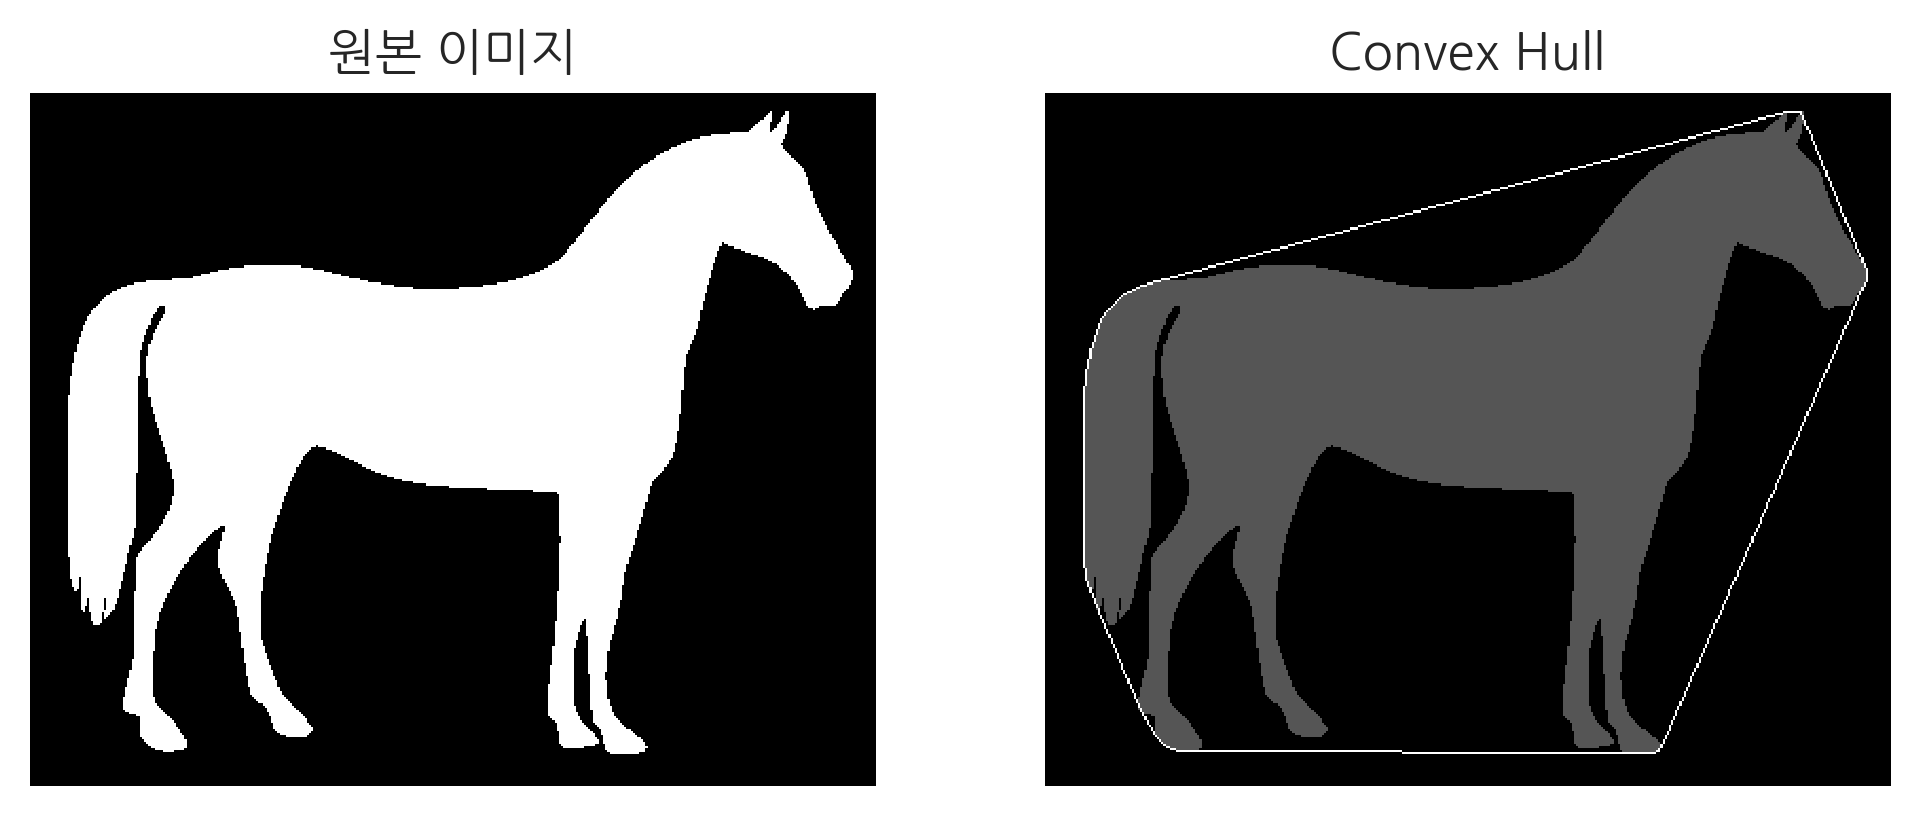

In [17]:
img4 = img_raw.copy().astype('uint8')

c0 = contours[0]
hull = cv2.convexHull(c0)
image4 = cv2.drawContours(img4, [hull], 0, 3)
titles = ['원본 이미지', 'Convex Hull']
images = [img_raw, img4]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], 'gray')
    plt.axis('off')

plt.show()

## Bounding Rectangle

Bounding Rectangle은 컨투어 라인을 둘러싸는 사각형을 그리는 방법이다. 사각형을 그리는 방법은 2가지가 있다.
1. `boundingRect`: Straight Bounding Rectangle : 물체의 회전은 고려하지 않은 사각형
2. `minAreaRect`: Rotated Rectangle : 물체의 회전을 고려한 사각형

다음 코드는 컨투어 라인 위에 두 가지 종류의 사각형을 그린다. 

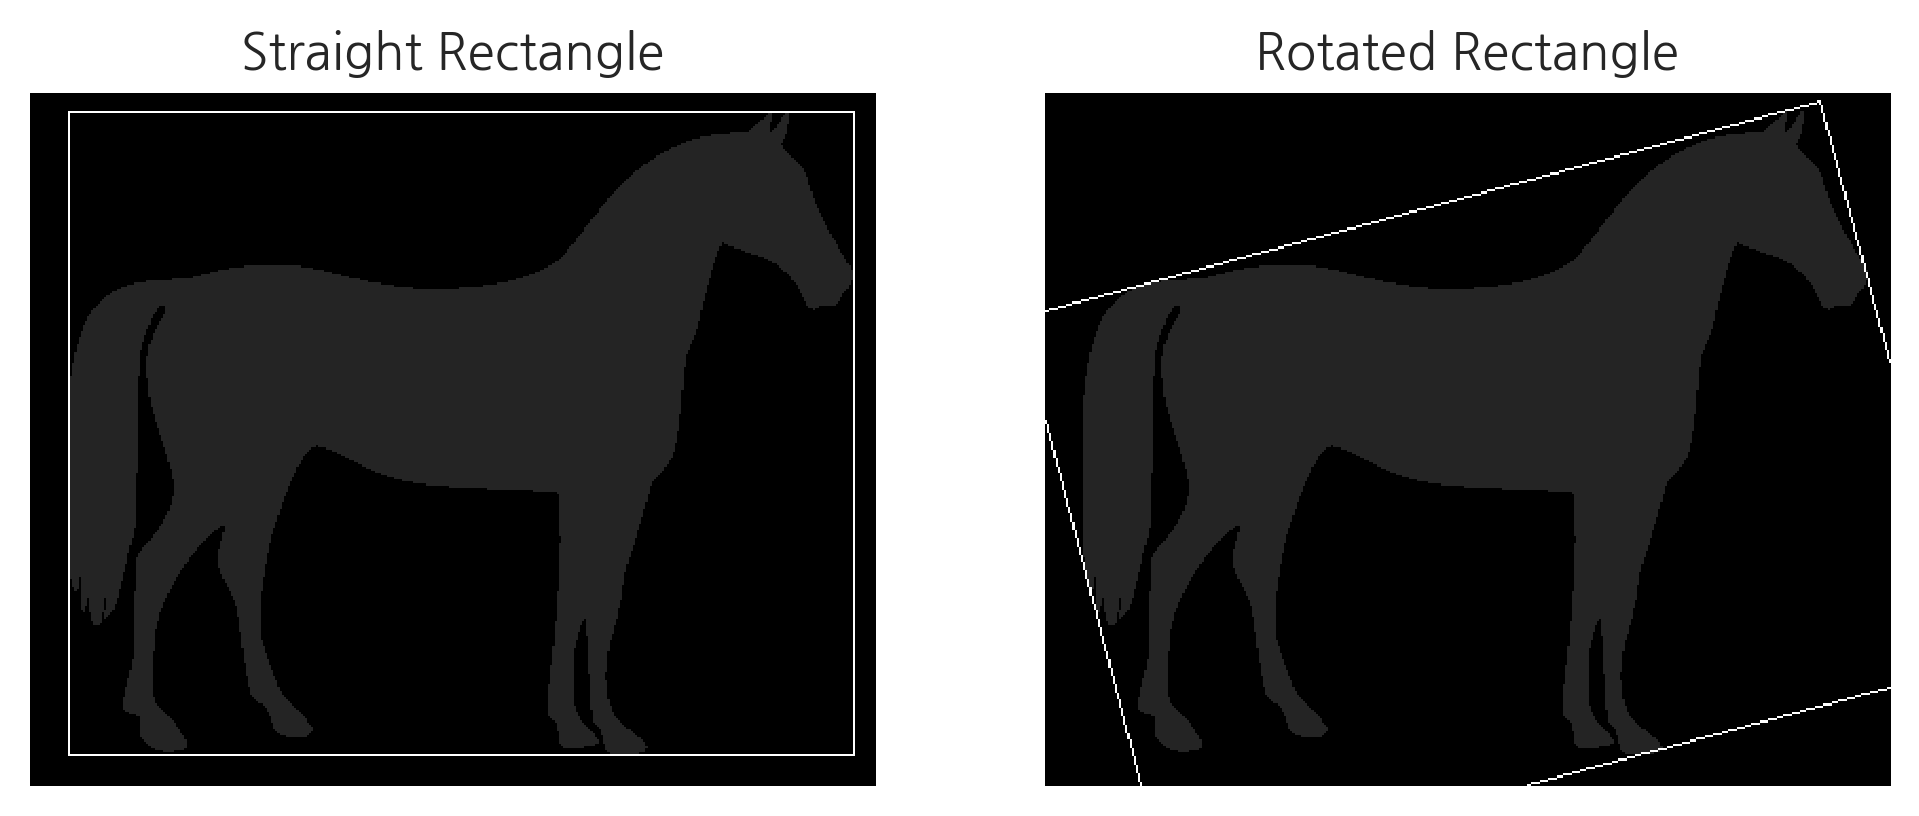

In [18]:

img1 = img_raw.copy().astype("uint8")
img2 = img_raw.copy().astype("uint8")

# Straight Rectangle
x, y, w, h = cv2.boundingRect(c0)
img1 = cv2.rectangle(img1, (x, y), (x+w, y+h), 7)

# Rotated Rectangle
rect = cv2.minAreaRect(c0)
box = cv2.boxPoints(rect)
box = box.astype('int')
img2 = cv2.drawContours(img2, [box], -1, 7) # blue

plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.axis('off')
plt.title("Straight Rectangle")
plt.subplot(1,2,2)
plt.imshow(img2, cmap="gray")
plt.axis('off')
plt.title("Rotated Rectangle")
plt.show()

## Minumum Enclosing Circle 과 Fitting Ellipse

Minumum Enclosing Circle과 Fitting Ellipse는 각각 컨투어 라인을 완전히 포함하는 가장 작은 원과 타원을 그리는 것이다.

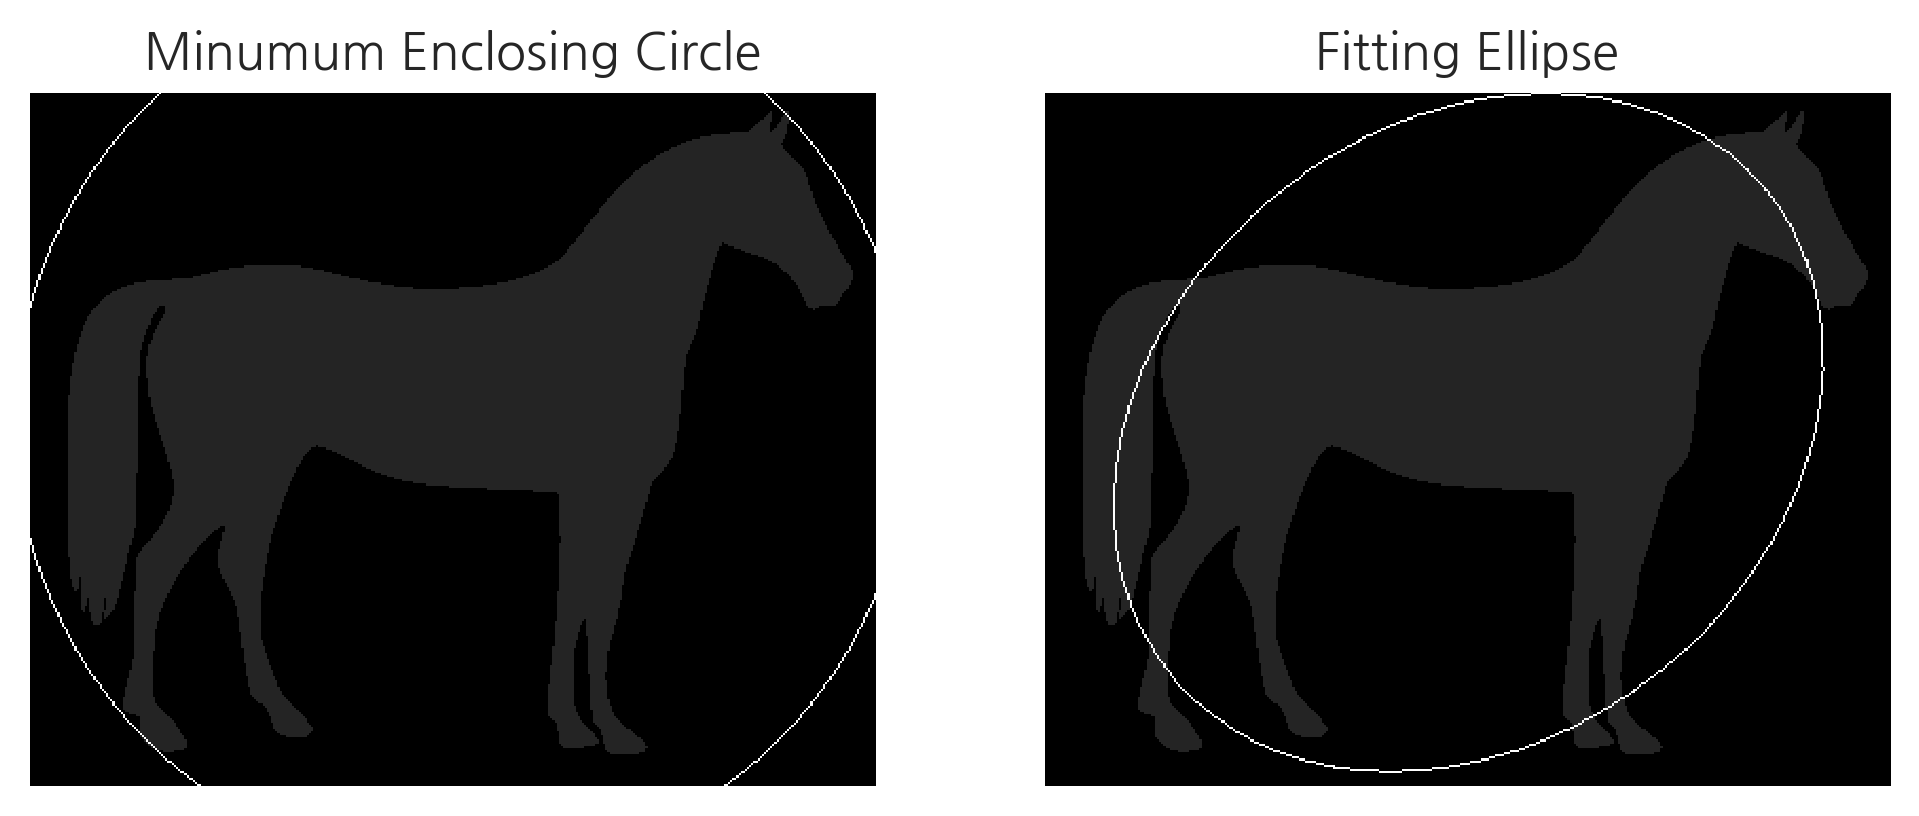

In [19]:
img3 = img_raw.copy().astype("uint8")
img4 = img_raw.copy().astype("uint8")

(x, y), radius = cv2.minEnclosingCircle(c0)
center = int(x), int(y)
radius = int(radius)
img3 = cv2.circle(img3, center, radius, 7)

ellipse = cv2.fitEllipse(c0)
img4 = cv2.ellipse(img4, ellipse, 7)


plt.subplot(1,2,1)
plt.imshow(img3, cmap="gray")
plt.axis('off')
plt.title("Minumum Enclosing Circle")
plt.subplot(1,2,2)
plt.imshow(img4, cmap="gray")
plt.axis('off')
plt.title("Fitting Ellipse")
plt.show()